
# Week12_1  Scipy: Interpolation and Integration

In this lecture, we will look at two other common sub-packages of Scipy: [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) and [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html).

## Interpolation

The simplest interpolation routine in [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html) is [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d):

In [1]:
from scipy.interpolate import interp1d

If we create a fake dataset:

In [2]:
import numpy as np
x = np.array([0., 1., 3., 4.])
y = np.array([0., 4., 3., 2.]) #giving x will give Y

we can interpolate linearly by first creating an interpolating function:

In [3]:
f = interp1d(x, y)

and we can then interpolate to any value of x within the original bounds:

In [4]:
f(0.5)

array(2.)

In [5]:
f(3.3)

array(2.7)

It is also possible to interpolate to several values at the same time:

In [6]:
f(np.array([0.5, 1.5, 2.5, 3.5]))

array([2.  , 3.75, 3.25, 2.5 ])

If the interpolating function is called outside the original range, an error is raised:

In [7]:
f(-1.)

ValueError: A value in x_new is below the interpolation range.

You can change this behavior by telling ``interp1d`` to not give an error in this case, but to use a set value:

In [8]:
f = interp1d(x, y, bounds_error=False, fill_value=-10.) #extension

In [9]:
f(-1.0)

array(-10.)

In [10]:
f(np.array([-1., 1., 3., 6.]))

array([-10.,   4.,   3., -10.])

By default, ``interp1d`` uses linear interpolation, but it is also possible to use e.g. cubic interpolation: 

In [11]:
f = interp1d(x, y, kind='cubic')
f(0.5)

array(2.58333333)

For more information, see the documentation for [interp1d](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d). There are also other interpolation functions available (for example for spline interpolation), which you can read up about at [scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html).

## 2D+ Interpolation

[interp2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d) a linear interpolation in 2D.

[LinearNDInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LinearNDInterpolator.html#scipy.interpolate.LinearNDInterpolator) which is a piecewise linear interpolant in N dimensions.

[NearestNDInterpolator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.NearestNDInterpolator.html#scipy.interpolate.NearestNDInterpolator), which selects the Nearest-neighbor interpolation in N dimensions.


## Integration

The available integration functions are listed at [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate). You will notice there are two kinds of functions - those that integrate actual Python functions, and those that integrate numerical functions defined by Numpy arrays.

First, we can take a look at one of the functions that can integrate actual Python functions. If we define a function:

In [12]:
def simple_function(x):
    return 3. * x**2 + 2. * x + 1.

we can integrate it between limits using:

In [13]:
from scipy.integrate import quad
print(quad(simple_function, 1., 2.)) # integral and uncertanty

(10.999999999999998, 1.221245327087672e-13)


As described in the documentation for [quad](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad), the first value returned is the integral, and the second is the error on the integral. If we had solved the integral analytically, we would expect 11, so the result is correct.

We can also define functions as Numpy arrays:

In [14]:
x = np.linspace(1., 2., 1000) #simps rule
y = 3. * x**2 + 2. * x + 1.

And in this case we can use for example the [simps](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) function to integrate using Simpson's rule:

In [15]:
from scipy.integrate import simps
print(simps(y, x=x))

11.000000000501505


This can be very useful in cases where one wants to integral actual data that cannot be represented as a simple function or when the function is only available numerically.

Note that there is an issue on the [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) page - there should also be a menton of the ``trapz`` function which works similarly to ``simps`` but does trapezium integration:

In [16]:
from scipy.integrate import trapz
print(trapz(y, x=x))

11.000000501001502


## Exercise

Write a function that takes ``x``, and the parameters for a Gaussian (amplitude, displacement, width) and returns the value of the Gaussian at ``x``:

In [52]:
def gausian(x):
    y = ampl*(np.exp(-(x - dis)**2/(2*w**2)))
    return y

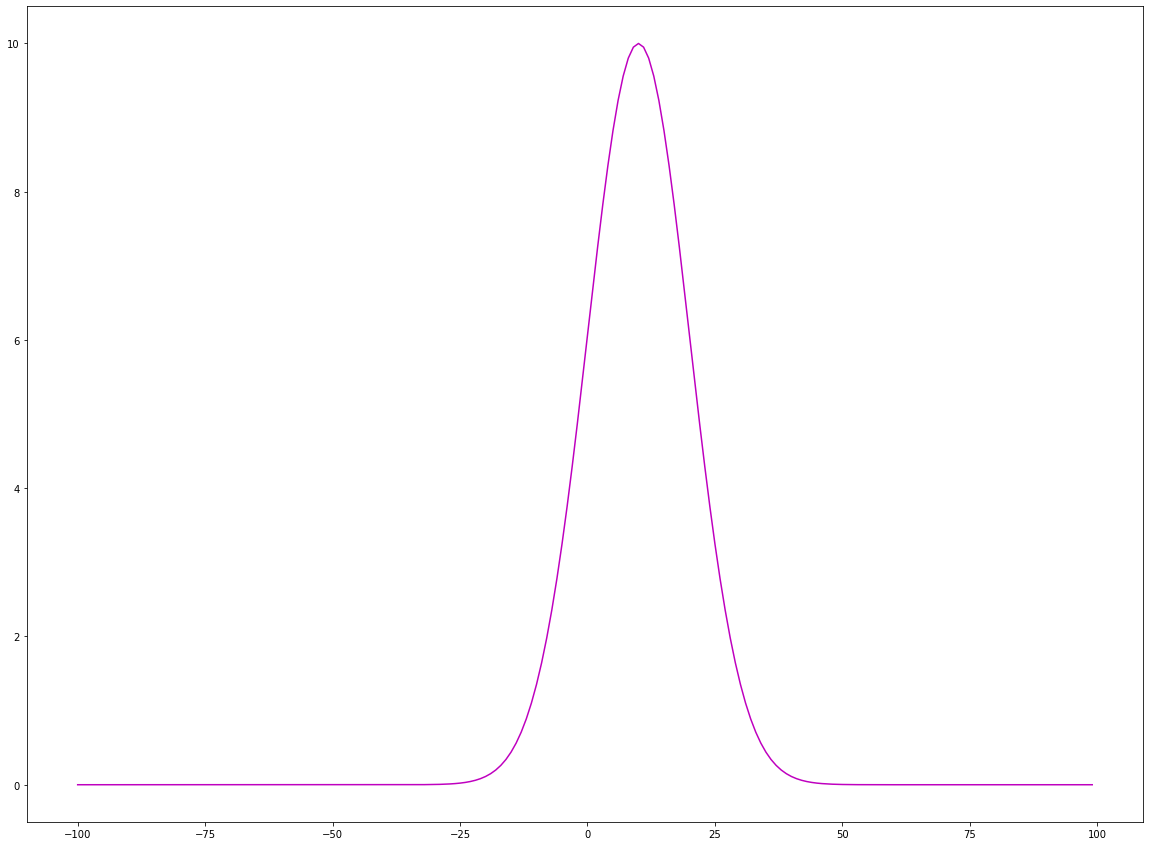

In [58]:
from matplotlib import pyplot as plt
y0 = 0
x = []
y = []
for i in range(-100,100,1):
    y0 = gausian(i)
    y.append(y0)
    x.append(i)
    
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.plot(x, y, c = 'm')

Use ``quad`` to compute the integral and compare to what you would expect.

In [56]:
from scipy.integrate import quad
print(quad(gausian, -50, 50))
# your solution here

(250.65488841277207, 9.165799556840841e-07)


Now create two arrays ``x`` and ``y`` that contain the Gaussian for fixed values ``x``, and try and compute the integral using ``simps``.

In [54]:
x = np.linspace(-50., 50., 1000) #simps rule
y = gausian(x)
from scipy.integrate import simps
print(simps(y, x=x))
# your solution here

250.6548884340733


Compare this to what you found with ``quad`` and analytically.

In [59]:
from scipy.integrate import trapz
print(trapz(y, x=x))
# the result, includind the error, is close to the analytical value

250.66282746310003
